# Installing necessary dependencies

In [1]:
# %pip install -Uq 'unstructured[pdf]' pillow lxml
# %pip install -Uq chromadb tiktoken
# %pip install -Uq langchain langchain-community 'transformers[torch]'
# %pip install -Uq python-dotenv

# Data extraction

Extract the element of the PDF. Could be: Text, Images, Tables, etc.

In [2]:
from unstructured.partition.pdf import partition_pdf

OUTPUT_PATH = './pdf/'
FILEPATH = OUTPUT_PATH + 'Photography-101-Pocket-Guide.pdf'

chunks = partition_pdf(
    filename=FILEPATH,
    infer_table_structure=True, # extract tables
    strategy='hi_res', # mandatory 'hi_res' for infer table
    extract_image_block_types=['Image'],
    extract_image_block_to_payload=True, # if True, will extract base64
    chunking_strategy='by_title', # 'by_title' or 'basic'
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000
)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [4]:
print(f'Total data chunk: {len(chunks)}')

Total data chunk: 15


View the first element of the chunk

In [6]:
first_element = chunks[0].metadata.orig_elements
first_element

Preview the extracted image from first element

In [7]:
chunk_images = [el for el in first_element if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'd792876d-02aa-4716-b8d4-50f478ecf14e',
 'text': '',
 'metadata': {'detection_class_prob': 0.3660457134246826,
  'coordinates': {'points': ((9.422920227050781, 531.5744018554688),
    (9.422920227050781, 1219.516845703125),
    (707.4541015625, 1219.516845703125),
    (707.4541015625, 531.5744018554688)),
   'system': 'PixelSpace',
   'layout_width': 700,
   'layout_height': 1025},
  'last_modified': '2025-01-02T13:05:57',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAKwAroDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm

Display the image example

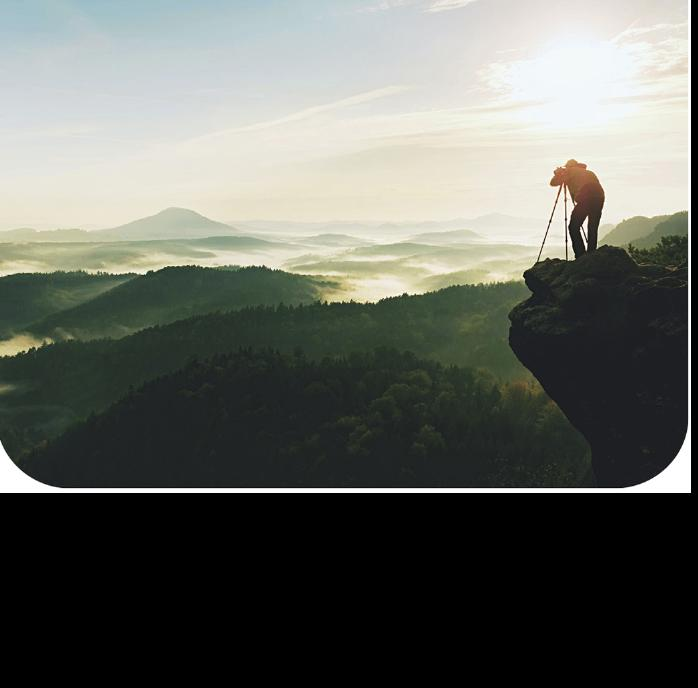

In [11]:
import base64
from IPython.display import display, Image

def display_base64(base64_code):
    image_data = base64.b64decode(base64_code)
    display(Image(image_data))

display_base64(chunk_images[0].to_dict()['metadata']['image_base64'])